In [2]:

# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'utkface-new:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F44109%2F78156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240922%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240922T192409Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07374bdc0620348cec480a6b8c292150ab08f664b105c69bc3fde45b684de49597c7ab1e6631f0895035839cd262b748a7821c3435fe4461857227ae30801dd6ede7848548d7c0c1451c2dd3a64c39d1fd8286101be1b7728b94d07ba31404f02382ffe059a1af9d9198f0e1e2acd2c23f144911e30725ee9e1ef28b0e22645d5caa1af100b95d6690e63484affedc8f16db51f9f07244766b68f38482be669c054205b85e72dd37c07010288b16b642f1fe627a7d8eea5801648fe8c208cf4e1fe22c33dce985e4476579440e87f83b35612682e4602c8973512c8985f38aecaad114f5081f5cd26c1af65f4883de0b4ff33c6aa11dc1cb56e34eb405c8a17a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 347342542 bytes downloaded
Downloaded and uncompressed: utkface-new
Data source import complete.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/UTKFace/26_0_0_20170117172431020.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/38_1_1_20170113001403081.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/57_1_0_20170120133336768.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/9_0_4_20170110215354740.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_3_20170119201446469.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_3_20170104222740327.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/63_1_0_20170120224812560.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_0_4_20170117200017039.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/16_1_0_20170109214621700.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/63_0_0_20170117194914689.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/2_1_2_20161219211133165.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/27_1_0_20170103182159657.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/30_0_2_20170116223016131.jpg.chip.jpg
/kaggle/input/u

# Import Libraries

In [4]:
import numpy as np
import pandas as pd

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [5]:
root_dir = "/kaggle/input/utkface-new/UTKFace/"

In [6]:
path_arr = []
age_arr = []
gender_arr = []

for file in tqdm(os.listdir(root_dir)):
    labels = file.split("_")

    filepath = os.path.join(root_dir, file)
    age = int(labels[0])
    gender = int(labels[1])

    path_arr.append(filepath)
    age_arr.append(age)
    gender_arr.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 381930.11it/s]


In [7]:
df = pd.DataFrame({
    "image_path": path_arr,
    "age": age_arr,
    "gender": gender_arr
})

In [8]:
df.head()

,image_path,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_1_1_20170...,26,1
1,/kaggle/input/utkface-new/UTKFace/36_0_0_20170...,36,0
2,/kaggle/input/utkface-new/UTKFace/79_0_0_20170...,79,0
3,/kaggle/input/utkface-new/UTKFace/29_0_1_20170...,29,0
4,/kaggle/input/utkface-new/UTKFace/8_1_0_201701...,8,1


In [9]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print("Total Size:", df.shape[0])
print("Train Size:", df_train.shape[0])
print("valid Size:", df_valid.shape[0])
print("Test Size:", df_test.shape[0])

Total Size: 23708
Train Size: 14224
valid Size: 4742
Test Size: 4742


# Visualization

### Train

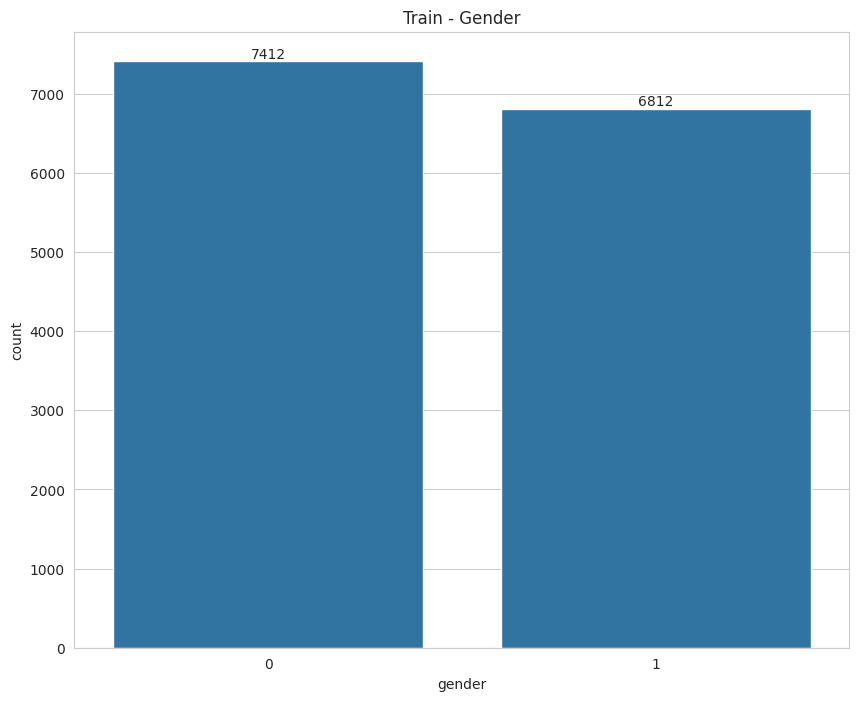

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_train["gender"].value_counts().index, data=df_train)
ax.set_title("Train - Gender")
for container in ax.containers:
    ax.bar_label(container)

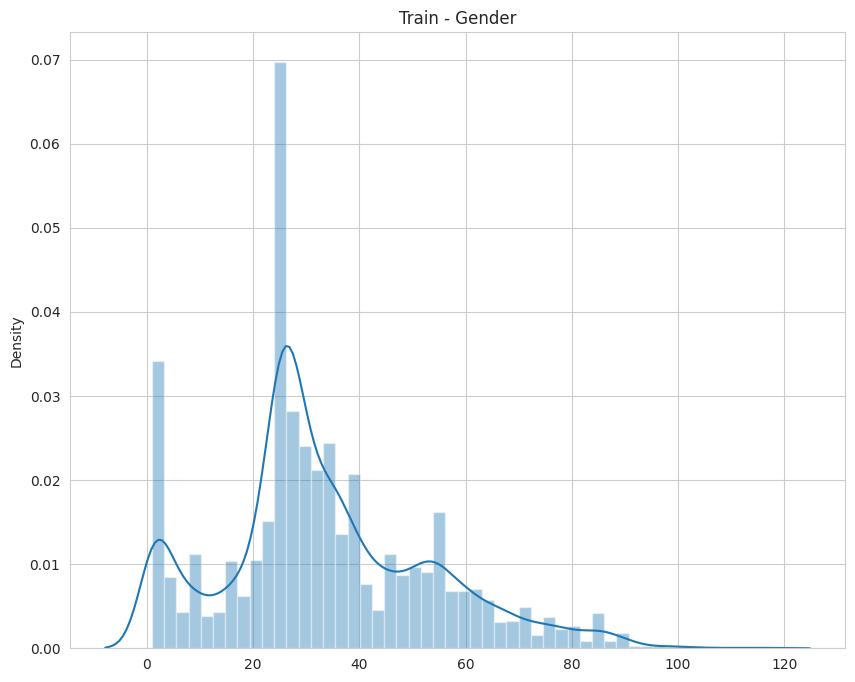

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_train["age"])
ax.set_title("Train - Gender")
plt.show()

### Valid

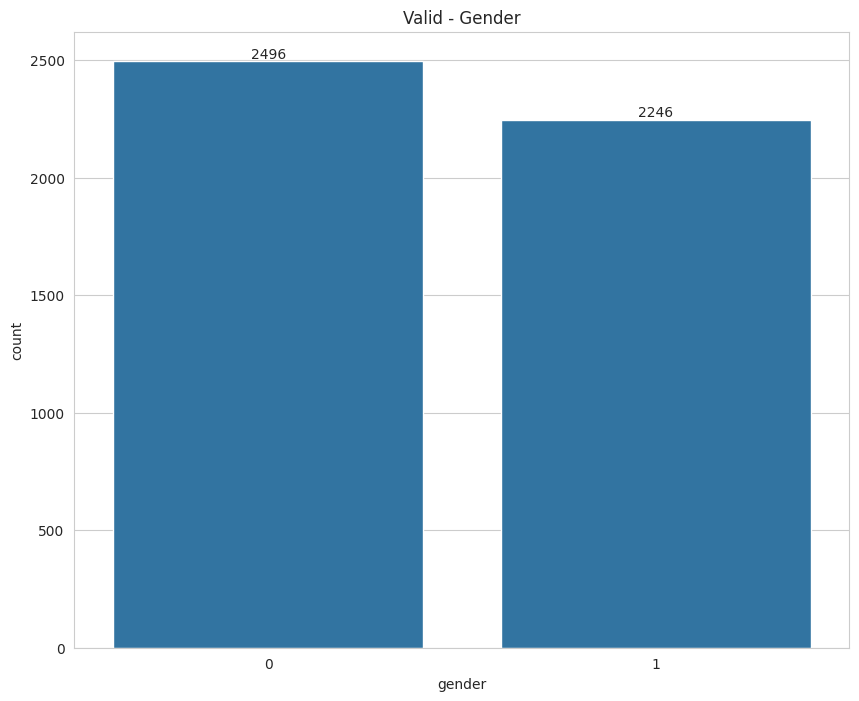

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_valid["gender"].value_counts().index, data=df_valid)
ax.set_title("Valid - Gender")
for container in ax.containers:
    ax.bar_label(container)

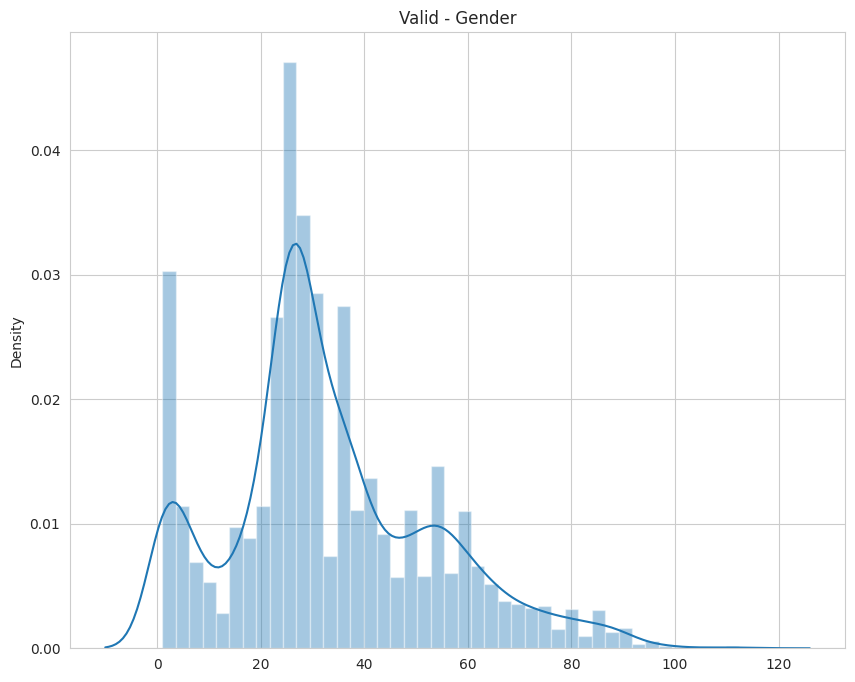

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_valid["age"])
ax.set_title("Valid - Gender")
plt.show()

### Test

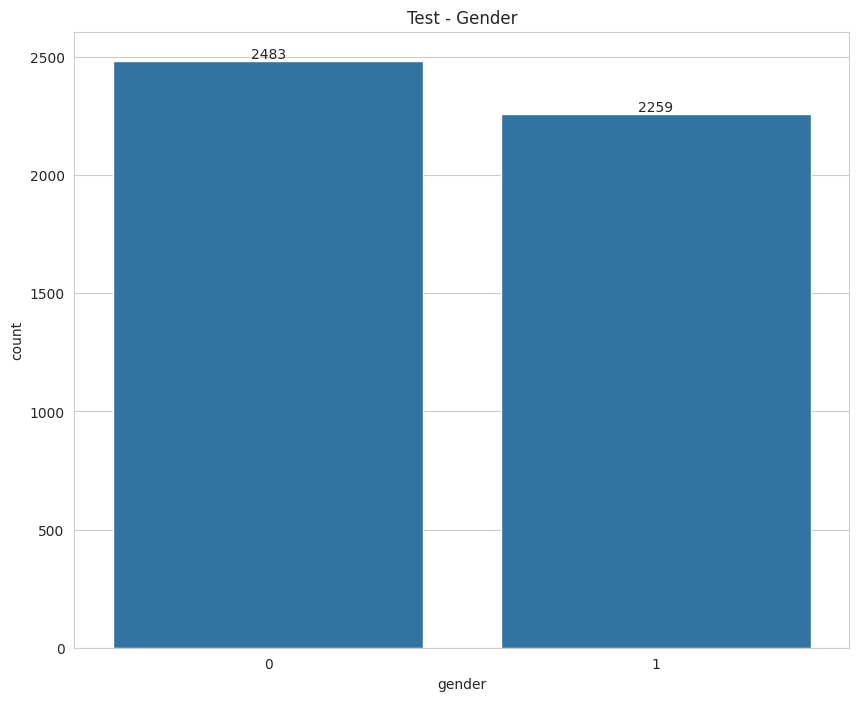

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_test["gender"].value_counts().index, data=df_test)
ax.set_title("Test - Gender")
for container in ax.containers:
    ax.bar_label(container)

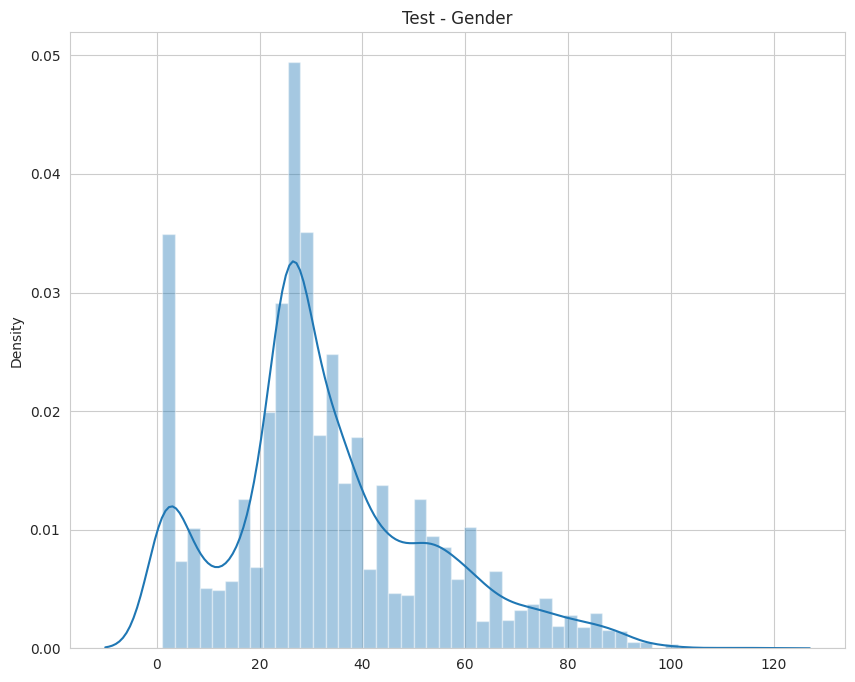

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_test["age"])
ax.set_title("Test - Gender")
plt.show()

In [16]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Age: {img_age}\nGender: {img_gender}")
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

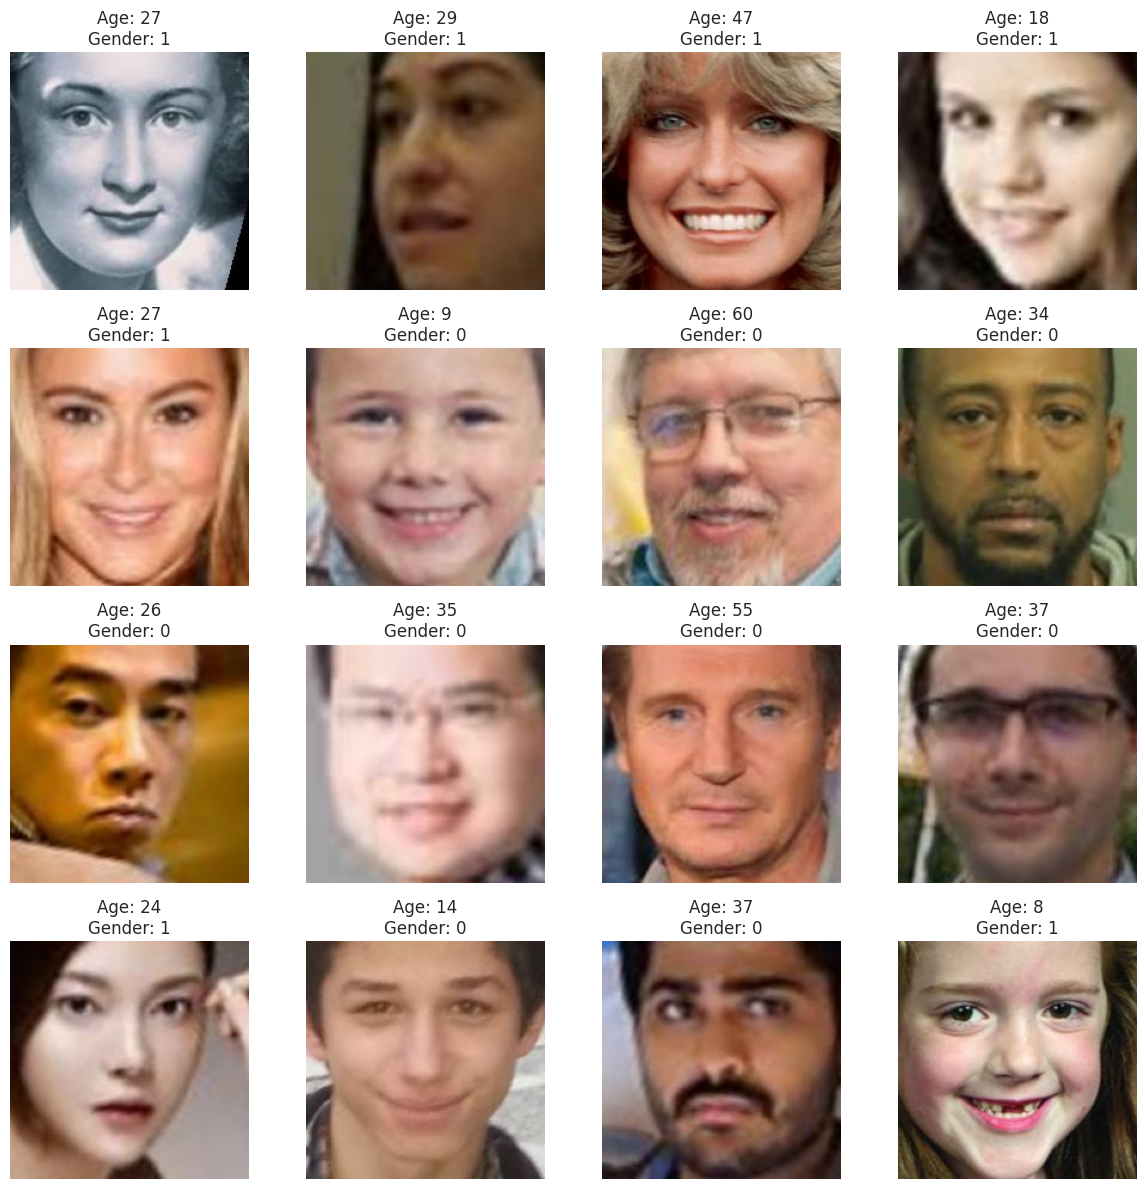

In [17]:
visualize_df(df_train)

In [18]:
train_img_arr = []
train_gender_arr = []
train_age_arr = []

for idx, row in tqdm(df_train.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    train_img_arr.append(img)
    train_gender_arr.append(row['gender'])
    train_age_arr.append(row['age'])

train_img_arr = np.array(train_img_arr).reshape(len(train_img_arr), 128, 128, 1)
train_gender_arr = np.array(train_gender_arr)
train_age_arr = np.array(train_age_arr)

14224it [00:21, 675.77it/s]


In [19]:
valid_img_arr = []
valid_gender_arr = []
valid_age_arr = []

for idx, row in tqdm(df_valid.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    valid_img_arr.append(img)
    valid_gender_arr.append(row['gender'])
    valid_age_arr.append(row['age'])

valid_img_arr = np.array(valid_img_arr).reshape(len(valid_img_arr), 128, 128, 1)
valid_gender_arr = np.array(valid_gender_arr)
valid_age_arr = np.array(valid_age_arr)

4742it [00:05, 886.99it/s]


In [20]:
test_img_arr = []
test_gender_arr = []
test_age_arr = []

for idx, row in tqdm(df_test.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    test_img_arr.append(img)
    test_gender_arr.append(row['gender'])
    test_age_arr.append(row['age'])

test_img_arr = np.array(test_img_arr).reshape(len(test_img_arr), 128, 128, 1)
test_gender_arr = np.array(test_gender_arr)
test_age_arr = np.array(test_age_arr)

4742it [00:06, 699.52it/s]


# Model

In [21]:
inputs = Input(shape=(128, 128, 1))

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max1)
max2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max2)
max3 = MaxPooling2D(pool_size=(2, 2))(conv3)

flat = Flatten()(max3)

dense1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.3)(dense1)
output_gender = Dense(1, activation='sigmoid')(drop1)

dense2 = Dense(256, activation='relu')(flat)
drop2 = Dropout(0.3)(dense2)
output_age = Dense(1, activation='relu')(drop2)

model = Model(inputs=[inputs], outputs=[output_gender, output_age])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy', 'mae'])

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 25088)          │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            257 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            257 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,938,754 (49.36 MB)

 Trainable params: 12,938,754 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

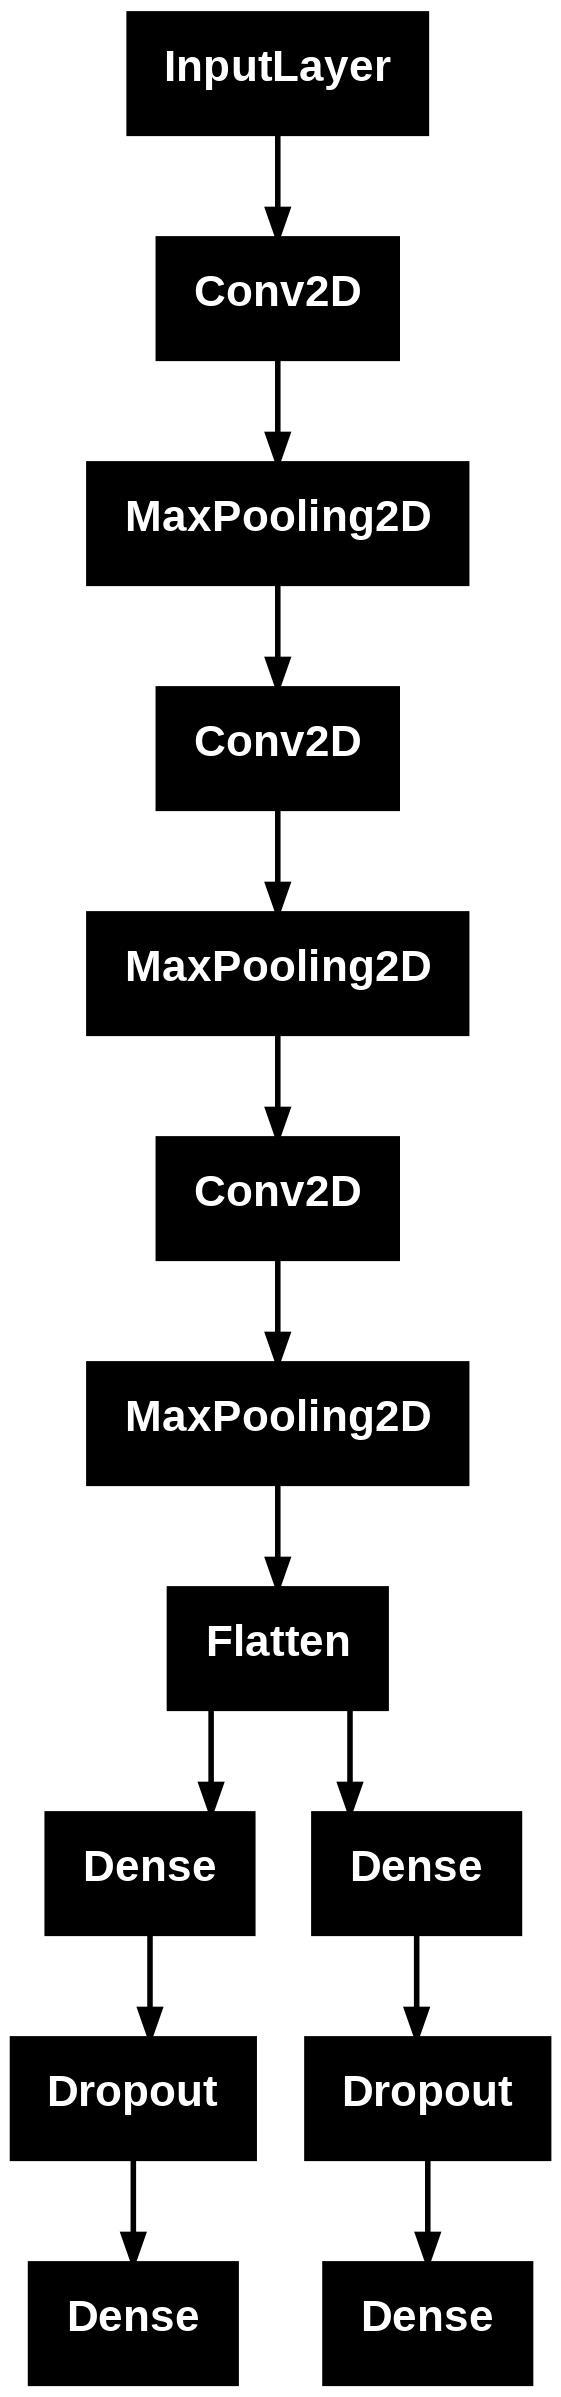

In [23]:
plot_model(model)

In [24]:
history = model.fit(x=train_img_arr, y=[train_gender_arr, train_age_arr], batch_size=64, epochs=25, validation_data=(valid_img_arr, [valid_gender_arr, valid_age_arr]))

Epoch 1/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - dense_1_accuracy: 0.5993 - dense_3_mae: 17.2742 - loss: 18.0611 - val_dense_1_accuracy: 0.7400 - val_dense_3_mae: 11.9356 - val_loss: 12.4485
Epoch 2/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - dense_1_accuracy: 0.7846 - dense_3_mae: 11.7597 - loss: 12.2215 - val_dense_1_accuracy: 0.8302 - val_dense_3_mae: 10.2342 - val_loss: 10.6014
Epoch 3/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - dense_1_accuracy: 0.8345 - dense_3_mae: 9.9763 - loss: 10.3413 - val_dense_1_accuracy: 0.8553 - val_dense_3_mae: 9.3131 - val_loss: 9.6359
Epoch 4/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - dense_1_accuracy: 0.8589 - dense_3_mae: 8.8905 - loss: 9.2135 - val_dense_1_accuracy: 0.8680 - val_dense_3_mae: 8.3208 - val_loss: 8.6131
Epoch 5/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - dense_1_accuracy: 0.8864 - dense_3_mae: 8.2657 - loss: 8.5295 - val_dense_1_accuracy: 0.8697 - val_dense_3_mae: 8.2654 - val_loss: 8.5601
Epoch 6/25
223/223 ━━━━━

# Plot the Results

In [25]:
history_df = pd.DataFrame(history.history)
history_df.head()

,dense_1_accuracy,dense_3_mae,loss,val_dense_1_accuracy,val_dense_3_mae,val_loss
0,0.668166,15.050815,15.685770,0.739983,11.935630,12.448513
1,0.800197,11.552308,11.985391,0.830240,10.234245,10.601363
2,0.843855,9.706074,10.053823,0.855335,9.313101,9.635900
3,0.863119,8.787856,9.097632,0.867988,8.320782,8.613121
4,0.881398,8.277291,8.551252,0.869675,8.265433,8.560061


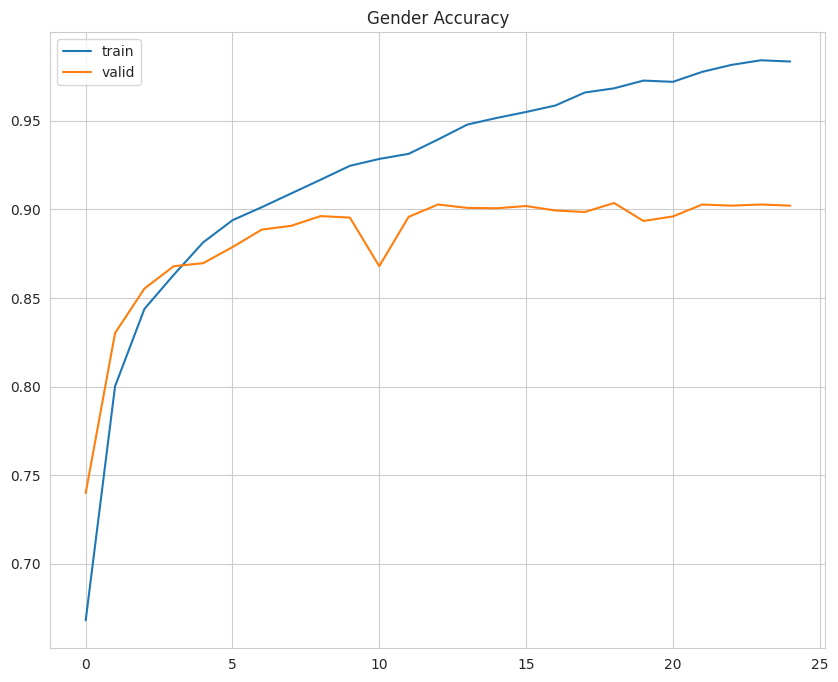

In [26]:
plt.figure(figsize=(10, 8))

plt.title("Gender Accuracy")

plt.plot(history_df["dense_1_accuracy"])
plt.plot(history_df["val_dense_1_accuracy"])

plt.legend(["train", "valid"])

plt.show()

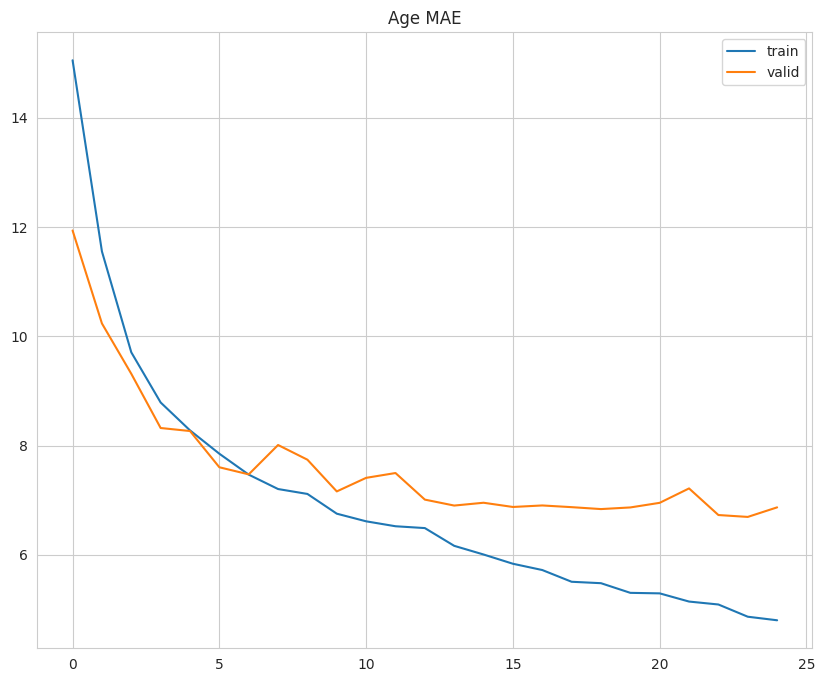

In [27]:
plt.figure(figsize=(10, 8))

plt.title("Age MAE")

plt.plot(history_df["dense_3_mae"])
plt.plot(history_df["val_dense_3_mae"])

plt.legend(["train", "valid"])

plt.show()

# Test

In [28]:
preds = model.predict(test_img_arr, verbose=0)
pred_gender = np.argmax(preds[0], axis=1)
pred_age = [round(pred[0]) for pred in preds[1]]

In [29]:
df_test["pred_age"] = pred_age
df_test["pred_gender"] = pred_gender

In [30]:
df_test.head()

,image_path,age,gender,pred_age,pred_gender
0,/kaggle/input/utkface-new/UTKFace/5_1_0_201701...,5,1,10,0
1,/kaggle/input/utkface-new/UTKFace/22_0_1_20170...,22,0,24,0
2,/kaggle/input/utkface-new/UTKFace/34_0_1_20170...,34,0,35,0
3,/kaggle/input/utkface-new/UTKFace/25_0_0_20170...,25,0,24,0
4,/kaggle/input/utkface-new/UTKFace/64_0_1_20170...,64,0,70,0


In [31]:
def visualize_results(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            gender_dict = {0: 'Male', 1: 'Female'}
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]
            img_pred_age = df.loc[a][['pred_age']].values[0]
            img_pred_gender = df.loc[a][['pred_gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Pred Age: {img_pred_age}(True:{img_age})\nPred Gender: {gender_dict[img_pred_gender]}(True:{gender_dict[img_gender]})")
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

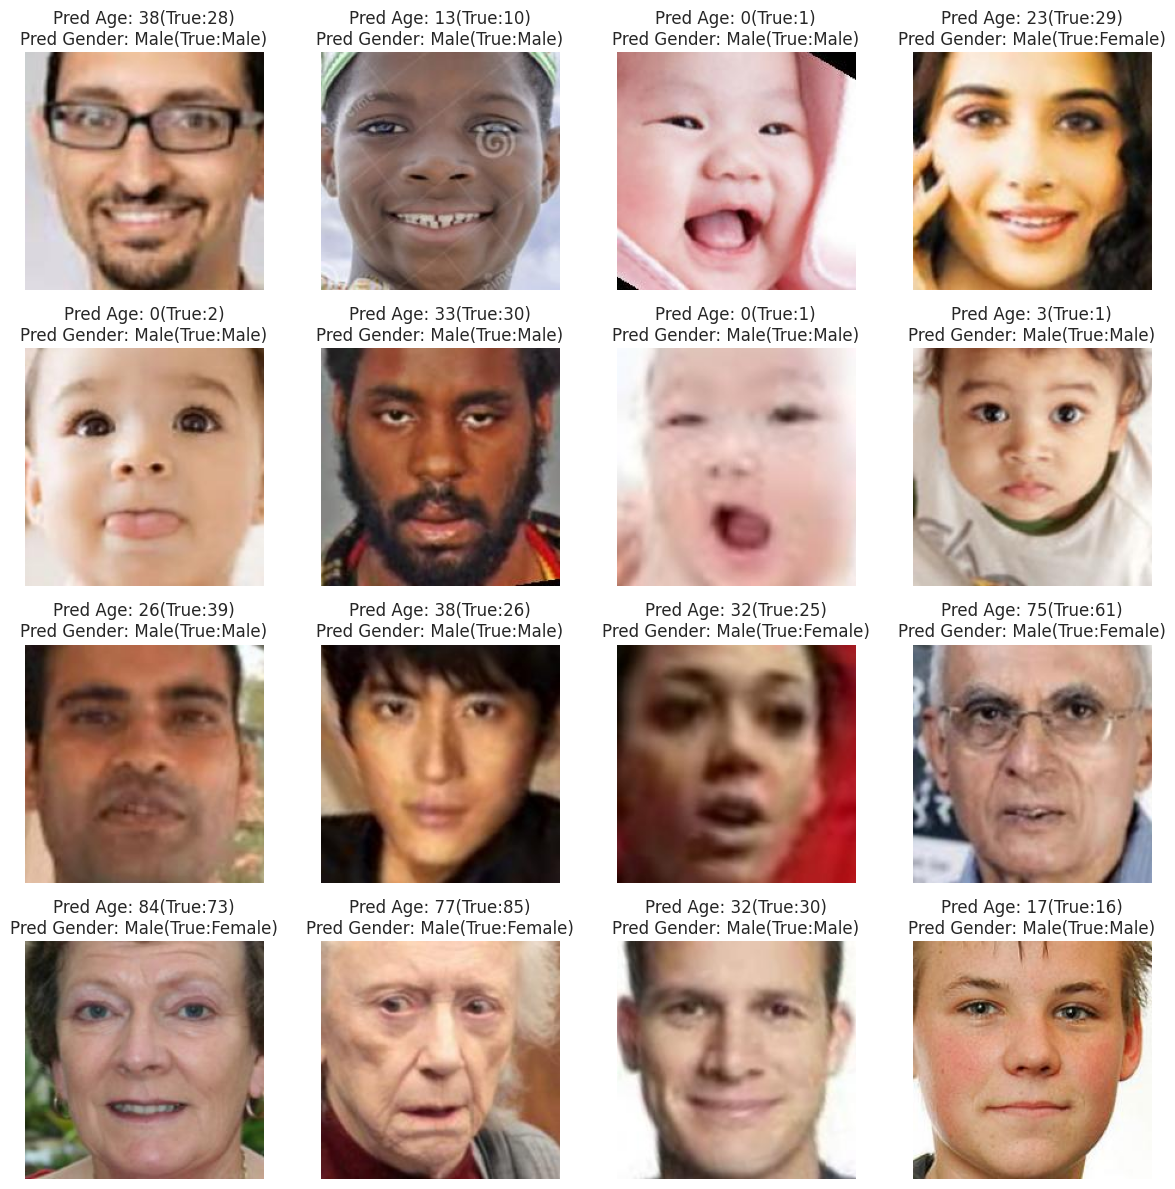

In [32]:
visualize_results(df_test)